In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

load all of data 

In [4]:
train=pd.read_csv("twitter_training.csv")
validation=pd.read_csv("twitter_validation.csv")

As we can see there are no column name present in datasets so,



At first put name for each column:

In [5]:
train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
train.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
validation.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
train.info()
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiment      999 non-null    object
 3   Tweet Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


Check the null values of data:

In [8]:
train.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [9]:
validation.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

Check the duplicate values in data:

In [10]:
train.duplicated().sum()

2700

In [11]:
train.dropna(subset=['Tweet Content'], inplace=True)

In [12]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

In [13]:
duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70957 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       70957 non-null  int64 
 1   Entity         70957 non-null  object
 2   Sentiment      70957 non-null  object
 3   Tweet Content  70957 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [15]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiment      999 non-null    object
 3   Tweet Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


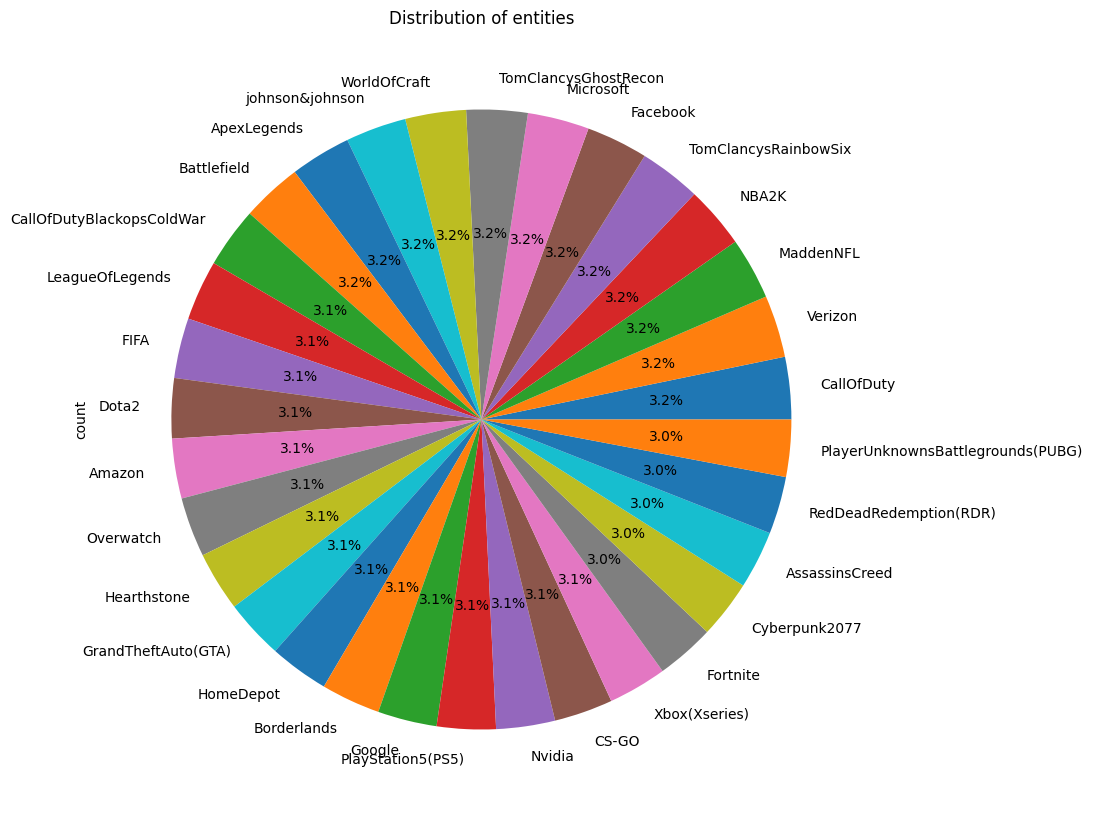

In [34]:
Entities=train['Entity'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')
plt.show()

Text(0.5, 1.0, 'Sentiment Distribution Train')

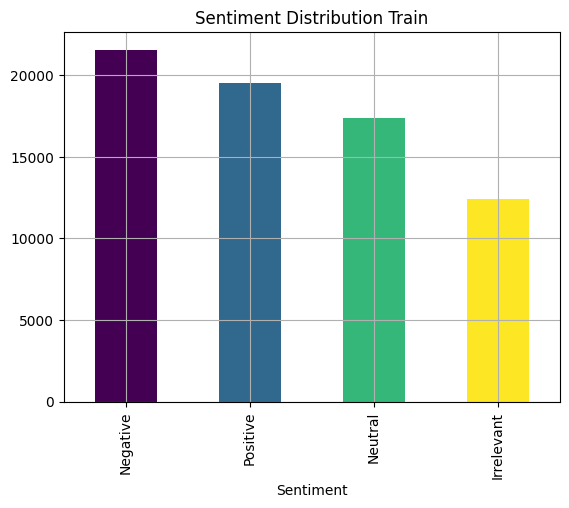

In [16]:
sentiment_content=train['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)
plt.title('Sentiment Distribution Train')

Text(0.5, 1.0, 'Sentiment Distribution Validation')

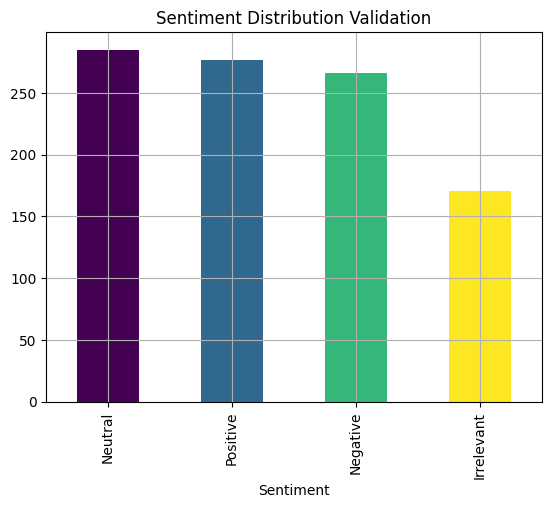

In [17]:
sentiment_content=validation['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)
plt.title('Sentiment Distribution Validation')

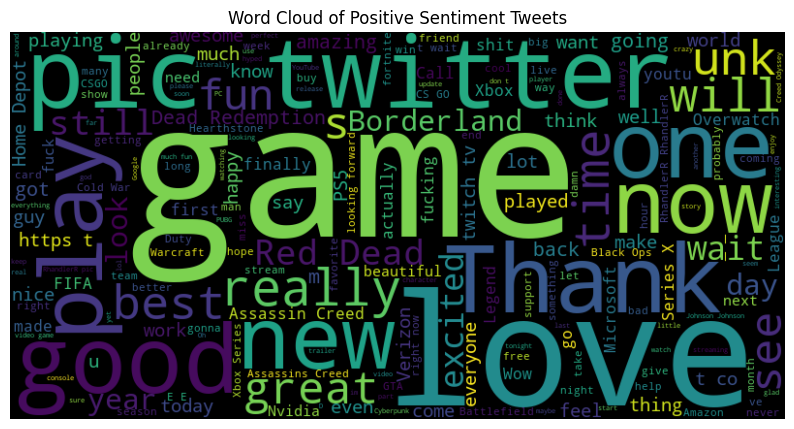

In [18]:
positive_tweets = train[train["Sentiment"] == "Positive"]["Tweet Content"]
positive_text = ' '.join(positive_tweets)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Tweets')
plt.show()

Now count the frequency of each word from Word Cloud of positive sentiment tweets

In [19]:
from wordcloud import STOPWORDS
from collections import Counter

words = positive_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('I', 7817),
 ('.', 2394),
 ('/', 2363),
 ('@', 2336),
 ('game', 1562),
 ('The', 1392),
 ('love', 1291),
 ('really', 1113),
 ("I'm", 1088),
 ('good', 1071),
 ('-', 935),
 ('new', 927),
 ('2', 900),
 ('This', 880),
 ('play', 851),
 ('will', 828),
 ('best', 815),
 ('playing', 778),
 ('one', 740),
 ('3', 692)]

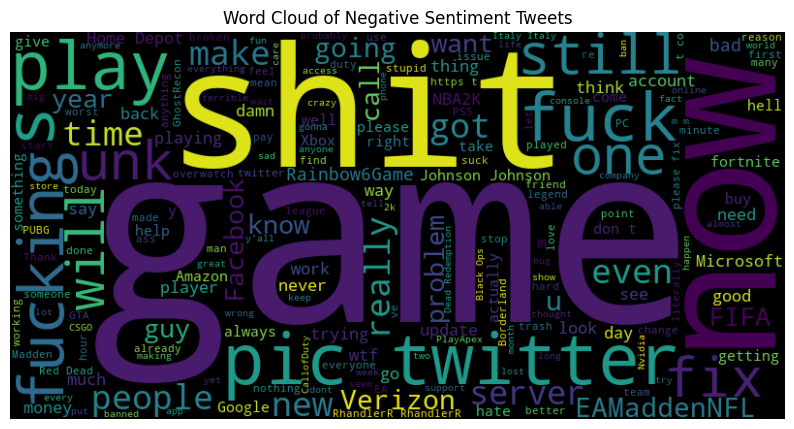

In [20]:
negative_tweets = train[train["Sentiment"] == "Negative"]["Tweet Content"]
negative_text = ' '.join(negative_tweets)
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Tweets')
plt.show()

In [21]:
words = negative_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('I', 8533),
 ('@', 4619),
 ('game', 2777),
 ('/', 2246),
 ('.', 1527),
 ('The', 1083),
 ('shit', 1052),
 ('fix', 1030),
 ('play', 997),
 ('still', 953),
 ('’', 943),
 ('now', 940),
 ('fucking', 866),
 ('will', 866),
 ('really', 865),
 ('even', 861),
 ('This', 837),
 ('&', 834),
 ('got', 787),
 ('one', 784)]

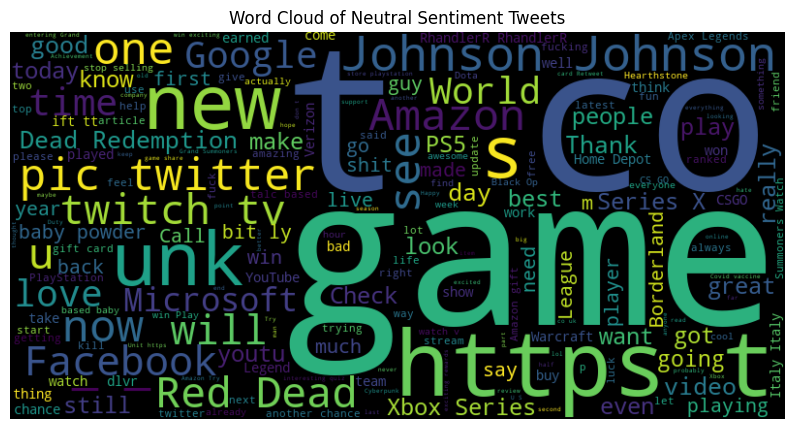

In [22]:
neutral_tweets = train[train["Sentiment"] == "Neutral"]["Tweet Content"]
neutral_text = ' '.join(neutral_tweets)
wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiment Tweets')
plt.show()

In [23]:
words = neutral_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('/', 7444),
 ('I', 4647),
 ('.', 3501),
 ('@', 2354),
 ('-', 2291),
 ('Johnson', 1630),
 ('The', 1590),
 ('&', 1363),
 ('_', 1050),
 ('2', 955),
 ('Amazon', 804),
 ('game', 768),
 ('will', 719),
 ('now', 615),
 ('A', 587),
 ('…', 587),
 ('Facebook', 565),
 ("I'm", 556),
 ('see', 539),
 ('Microsoft', 537)]

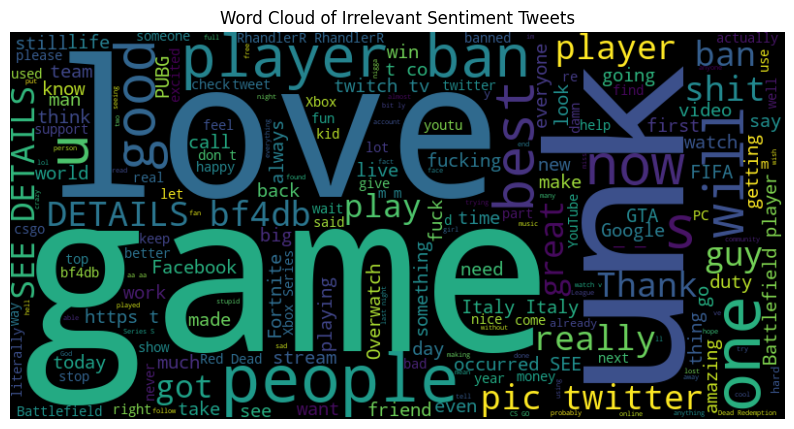

In [24]:
Irrelevant_tweets = train[train["Sentiment"] == "Irrelevant"]["Tweet Content"]
Irrelevant_text = ' '.join(Irrelevant_tweets)
wordcloud = WordCloud(width=800, height=400).generate(Irrelevant_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Irrelevant Sentiment Tweets')
plt.show()

In [25]:
words = Irrelevant_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('I', 3691),
 ('/', 2537),
 ('.', 2238),
 ('@', 1667),
 ('The', 878),
 ('player', 786),
 ('A', 674),
 ('ban', 674),
 ('-', 659),
 ('people', 599),
 ('_', 588),
 ('4', 557),
 ('This', 544),
 ('will', 540),
 ('game', 519),
 ('one', 510),
 ('love', 505),
 ("I'm", 489),
 ('see', 487),
 ('Battlefield', 478)]

In [26]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split

Train Test Split

In [27]:
data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

data_train, data_test = train_test_split(data, test_size = 0.1)

data_train.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1312\2152774314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1312\2152774314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment_label'].cat.codes


,Tweet Content,Sentiment,Sentiment_label
3358,Please be fake. Looks way too similar about MW,2,Neutral
61725,Just Tried GTA V... It's freaking bloody expan...,3,Positive
42463,PUBG: Purple Invincible Babaaa aa aa aa aa aa ...,0,Irrelevant
36287,"BleepinComputer: Fast forward to 2020, and Mic...",2,Neutral
48994,Well I've put on 10lbs won big prem<unk> wolve...,0,Irrelevant
69930,OH MY SWEET APPLES... @ Emberstreaming.. That ...,0,Irrelevant
34683,my brother later got scammed on to fortnite.,1,Negative
9063,"Last night, the Overwatch team took off on you...",0,Irrelevant
21818,I just realized Kero got a .. After 1 year of ...,0,Irrelevant
52373,RT @cragon_ . 5 games I've most enjoyed mysel...,3,Positive


In [28]:
data_test.head(10)

,Tweet Content,Sentiment,Sentiment_label
23773,The Daily Luigi Fact... Google knows too much....,2,Neutral
26819,This is just more good news. And like mention ...,3,Positive
71944,"""Jumping feet first over something isn't your ...",2,Neutral
63642,"This is one of the worst lunatics in years, th...",1,Negative
21325,@ CSGO I am getting kicked by people after I h...,1,Negative
46574,Today’s Sponsor Is Book Of Legends,0,Irrelevant
40697,A ban for Battlefield 4 player mertjoker1831 h...,0,Irrelevant
52593,I do blame RDR2,3,Positive
50262,I would love to pay for @ EASPORTSFIFA 21 if t...,1,Negative
23234,[ . . ESEA! ESEA! ESEA! . Good luck today boys...,0,Irrelevant


BERT

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

data_train, data_test = train_test_split(data, test_size=0.1)

train_texts = data_train['Tweet Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
test_texts = data_test['Tweet Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

num_labels = len(data['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :])  # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

# Use smaller batch size
batch_size = 16

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_dataset.batch(batch_size), epochs=2)

model.evaluate(test_dataset.batch(batch_size))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/2


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 253/3992 [>.............................] - ETA: 24:08:36 - loss: 1.1563 - accuracy: 0.5035

KeyboardInterrupt: 

We can see that training Large Language Models like BERT can be take a long time , here at 253 iters we have got accuracy 0.5035 and we surely get the accuracy above 0.75 . It takes more time so I Stop the algorithm at middle.

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

train_predictions = model.predict(train_dataset.batch(64))
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

train_predicted_sentiments = data['Sentiment_label'].cat.categories[train_predicted_labels]
test_predicted_sentiments = data['Sentiment_label'].cat.categories[test_predicted_labels]

train_true_labels = data_train['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

train_classification_rep = classification_report(train_true_labels, train_predicted_sentiments)
print("Training Set - Classification Report:\n", train_classification_rep)
train_confusion_mat = confusion_matrix(train_true_labels, train_predicted_sentiments)
labels = np.unique(train_true_labels)

train_display = ConfusionMatrixDisplay(confusion_matrix=train_confusion_mat, display_labels=labels)
train_display.plot(cmap='Blues') 
plt.title("Training Set - Confusion Matrix")
plt.grid(False)
plt.show()

test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()

 19/998 [..............................] - ETA: 4:50:44

KeyboardInterrupt: 

Also same for validation dataset , we can get about 0.75 accuracy, As same I stop the algorithm at middle as It seems very long time to complete iters.